In [6]:
def readDataFromFile(filename):
    from numpy import genfromtxt
    print "reading data please wait..."
    my_data = genfromtxt(filename, delimiter=',',skip_header=1)
    print my_data.shape
    return my_data

In [11]:
def plotDataIn2D(x_data, y_data):
    %pylab inline
    proj = pca.fit_transform(x_data)
    plt.scatter(proj[:, 0], proj[:, 1], c=y_data)
    plt.colorbar()

In [39]:
def writeFile(y_data):
    f = open('myfile','w')
    f.write("ImageId,Label\n")
    i = 1;
    for k in y_data:
        f.write(str(i) + "," + str(int(k)) + "\n")
        i = i+1
    f.close()

In [5]:
train_data = readDataFromFile('train.csv')

reading data please wait...
(42000, 785)


In [7]:
test_data = readDataFromFile('test.csv')

reading data please wait...
(28000, 784)


In [10]:
Y = train_data[:,0]
X = train_data[:,range(1,785)]
print Y.shape, X.shape

(42000,) (42000, 784)


In [9]:
XT = test_data
print XT.shape

(28000, 784)


In [65]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=80)

In [59]:
# not working
# from sklearn.manifold import TSNE
# pca = TSNE(n_components=100, random_state=0)

In [70]:
xs = pca.fit_transform(X[range(42000),:])
ys = Y

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
classifier = GaussianNB()

In [78]:
# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

In [80]:
# split the data into training and validation sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs,ys)
X_train = xs
y_train = ys
# train the model
classifier.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = classifier.predict(X_test)
expected = y_test

Populating the interactive namespace from numpy and matplotlib


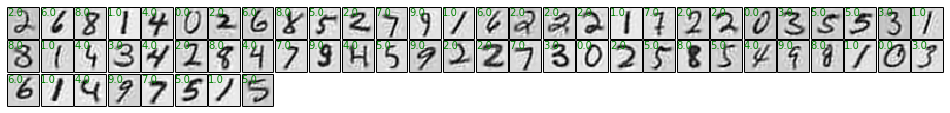

In [82]:
%pylab inline
fig = plt.figure(figsize=(13, 13))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(28, 28, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.inverse_transform(X_test[i]).reshape(28,28), cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [81]:
matches = (predicted == expected)
print matches.sum()
print len(matches)

10500
10500


In [75]:
from sklearn import metrics
print metrics.classification_report(expected, predicted)
print metrics.confusion_matrix(expected, predicted)

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1055
        1.0       0.98      0.99      0.99      1168
        2.0       0.98      0.96      0.97      1038
        3.0       0.96      0.96      0.96      1050
        4.0       0.97      0.97      0.97      1047
        5.0       0.96      0.96      0.96       972
        6.0       0.98      0.99      0.98      1006
        7.0       0.97      0.98      0.97      1087
        8.0       0.98      0.95      0.97      1024
        9.0       0.95      0.95      0.95      1053

avg / total       0.97      0.97      0.97     10500

[[1052    0    1    0    0    0    1    0    1    0]
 [   0 1161    2    2    0    0    1    2    0    0]
 [   8    5 1001    3    0    2    1   15    1    2]
 [   1    0    7 1005    0   16    1    6   10    4]
 [   1    5    0    0 1014    1    2    2    0   22]
 [   4    1    0   14    1  929   13    1    3    6]
 [   7    1    0    0    3    2  992    0  

In [83]:
xt_trans = pca.transform(XT)
print xt_trans.shape

(28000, 80)


In [84]:
pred = classifier.predict(xt_trans)
print pred
writeFile(pred)

[ 2.  0.  9. ...,  3.  9.  2.]
